In [3]:
import numpy as np
from mpmath import mp, mpf, sin, pi, fadd, fsub, fmul, fdiv
import matplotlib.pyplot as plt

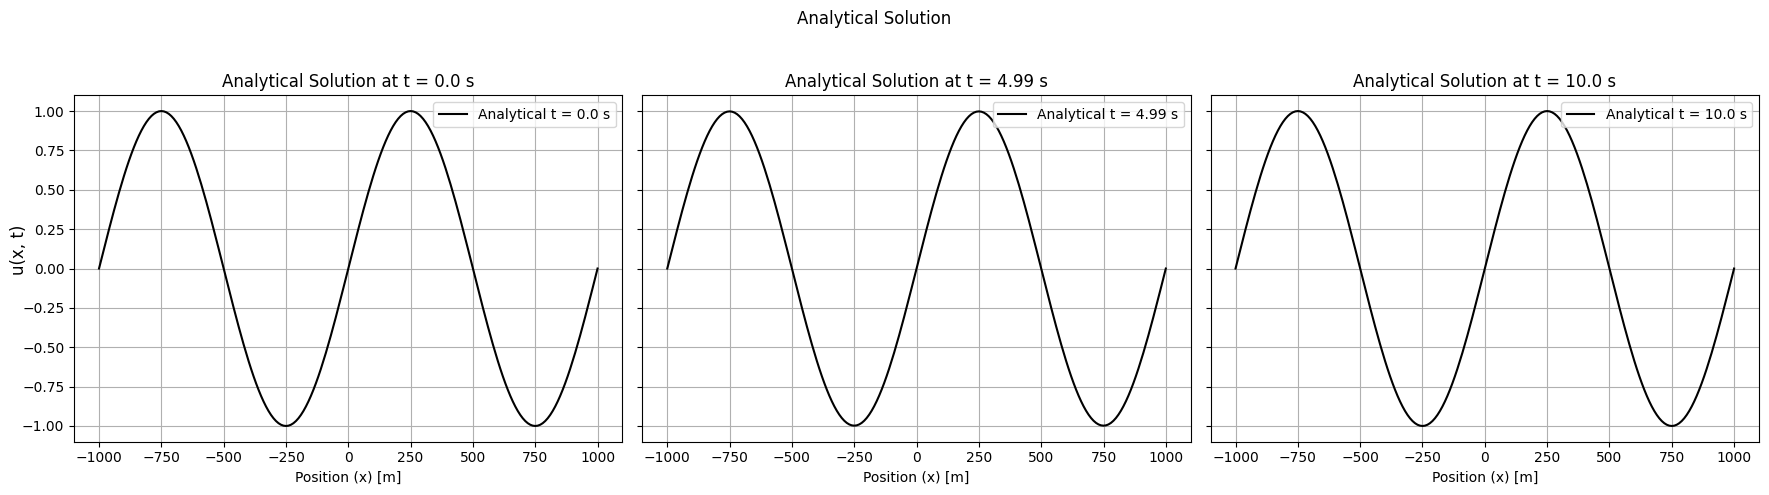

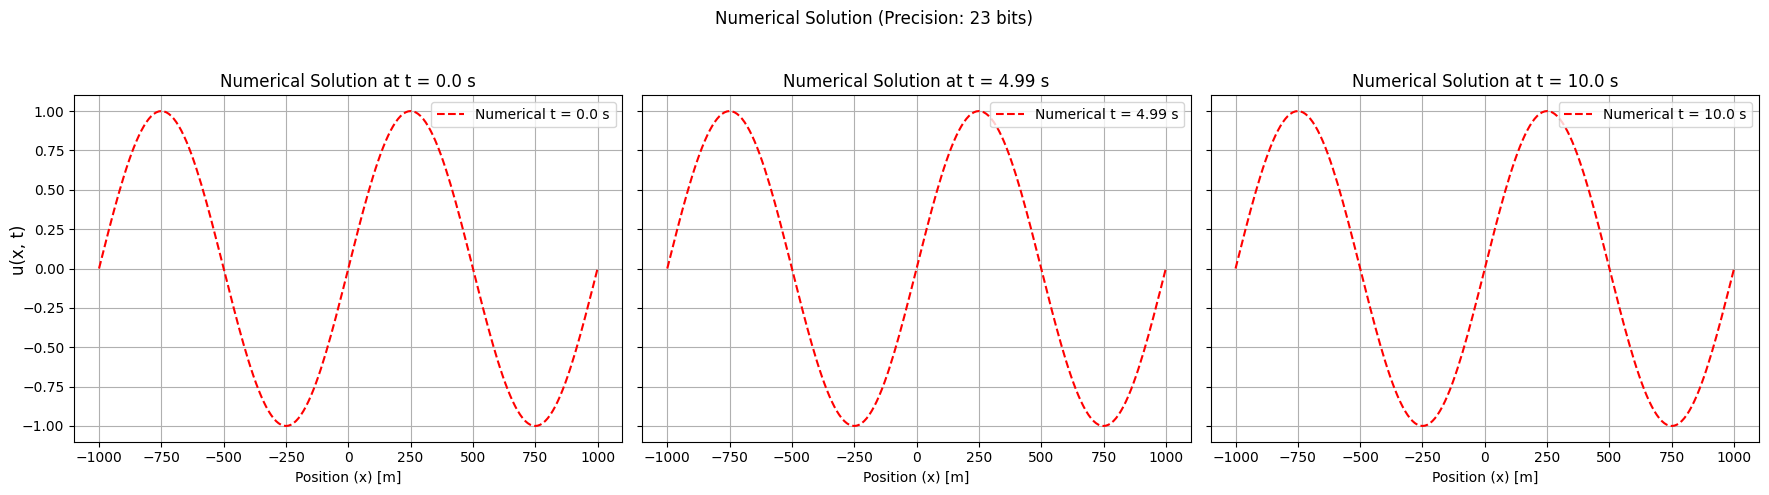

In [4]:
# Set precision
mp.prec = 23

# Constants
L = 1000.0                  # Half-length of the domain in meters (standard float)
c = 1000.0                    # Wave speed in m/s (standard float)
N = 201                    # Number of spatial points
dx = 2 * L / (N - 1)          # Spatial step size for [-L, L] domain
courant = 1
dt = courant * dx / c             # Time step size (CFL condition)
T = 10             # Total simulation time in seconds (period is T=1)
x = np.linspace(-L, L, N)  # Spatial grid as a NumPy array

# Total time steps
Nt = int(T / dt) + 1

# Analytical Solution
def analytical_solution(t, x=x, c=c, L=L):
    t_np = float(t)
    return np.cos(2 * np.pi * c * t_np / L) * np.sin(2 * np.pi * x / L)

# Initialize the wave field
u = analytical_solution(0)  # Initial condition u(x, 0) as float
u_prev = u.copy()                          # Initial velocity is zero: u_t(x, 0) = 0
u_next = np.zeros(N, dtype=np.float64)     # Placeholder for the next time step

# Dynamic time indices for plotting and error storage
plot_times = [0, Nt // 2 - 1, Nt - 1]      # Start, middle, and end of the time range
u_num_at_t = {}
errors = []

# Main time evolution loop
for n in range(Nt):
    # Store the results for specific time indices
    if n in plot_times:
        u_num_at_t[n] = u.copy()  # Store the wave profile at the specified time indices

    # Compute the next time step using finite difference
    coeff = fdiv(fmul(mpf(c), mpf(dt)), mpf(dx))
    coeff_squared = fdiv(coeff, coeff)

    for i in range(1, N - 1):
        # Compute the finite difference term with mpf arithmetic
        term2 = fadd(fsub(mpf(u[i + 1]), fmul(mpf(2), mpf(u[i]))), mpf(u[i - 1]))
        update = fmul(coeff_squared, term2)  # (c * dt / dx) ** 2 * (term2)
        u_next[i] = float(fadd(fsub(fmul(mpf(2), mpf(u[i])), mpf(u_prev[i])), update))  # Cast result back to float

    # Apply boundary conditions (no need for mpf here)
    u_next[0] = 0.0
    u_next[-1] = 0.0

    # Compute error at this time step (if plot_times include the current time step)
    t = n * dt
    if n in plot_times:
        u_analytic = analytical_solution(t)
        errors.append({
            "time": t,
            "error": max(abs(u[i] - u_analytic[i]) for i in range(N))
        })

    # Update arrays for the next time step
    u_prev = u.copy()
    u = u_next.copy()

## Plotting the analytical solution
fig1, axs1 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, idx in enumerate(plot_times):
    t = idx * dt
    # Analytical solution at time t using NumPy variables
    u_analytic = analytical_solution(t)
    axs1[i].plot(x, u_analytic, 'k-', label=f"Analytical t = {float(t)} s")

    # Plot formatting
    axs1[i].set_xlabel("Position (x) [m]")
    axs1[i].set_title(f"Analytical Solution at t = {float(t)} s")
    axs1[i].legend()
    axs1[i].grid(True)

# Set global y-axis label
fig1.supylabel("u(x, t)")
fig1.suptitle("Analytical Solution")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Plotting the numerical solution
fig2, axs2 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, idx in enumerate(plot_times):
    t = idx * dt
    # Retrieve the numerical solution for the mapped time index
    u_num = u_num_at_t[idx]
    axs2[i].plot([float(x_i) for x_i in x], [float(u_n) for u_n in u_num], 'r--', label=f"Numerical t = {float(t)} s")

    # Plot formatting
    axs2[i].set_xlabel("Position (x) [m]")
    axs2[i].set_title(f"Numerical Solution at t = {float(t)} s")
    axs2[i].legend()
    axs2[i].grid(True)

# Set global y-axis label
fig2.supylabel("u(x, t)")
fig2.suptitle(f"Numerical Solution (Precision: {mp.prec} bits)")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


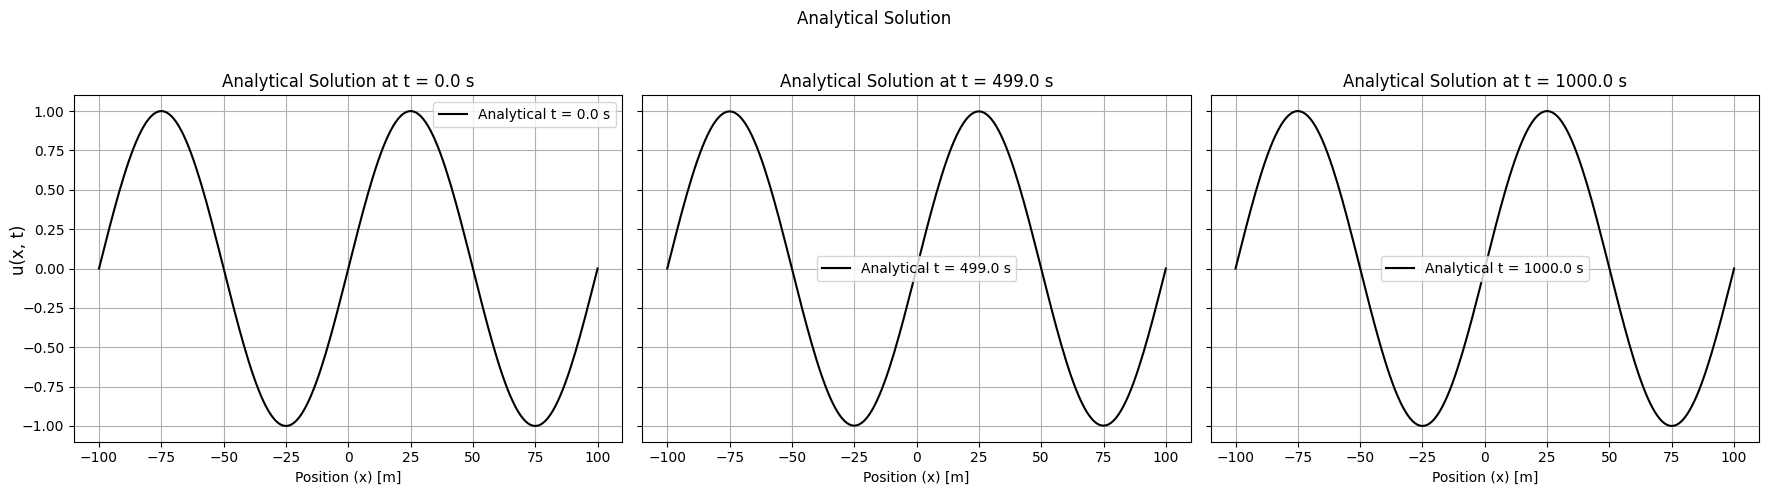

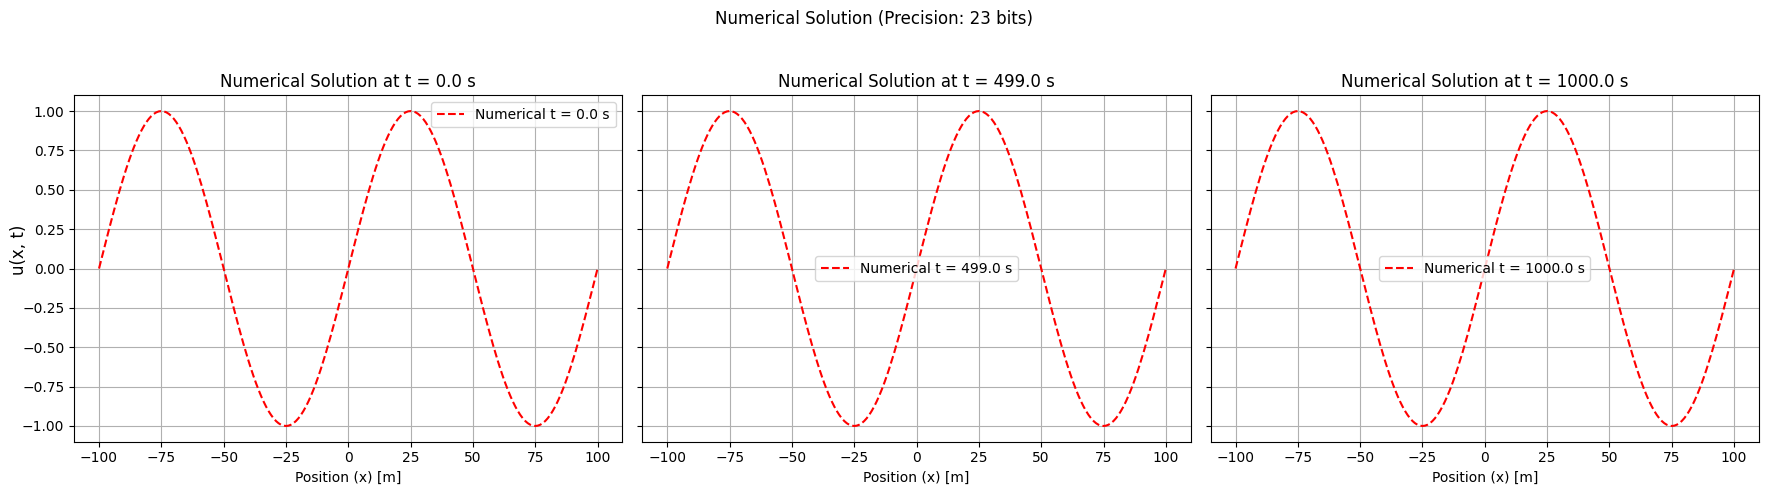

In [5]:
# Set precision
mp.prec = 23

# Constants
L = 100.0                  # Half-length of the domain in meters (standard float)
c = 1.0                    # Wave speed in m/s (standard float)
N = 201                    # Number of spatial points
dx = (2 * L) / (N - 1)     # Spatial step size for [-L, L] domain
courant = 1
dt = courant * dx / c                # Time step size (CFL condition)
T = 1000.0                 # Total simulation time in seconds (period is T=100)
x = np.linspace(-L, L, N)  # Spatial grid as a NumPy array

# Total time steps
Nt = int(T / dt) + 1

# Analytical Solution
def analytical_solution(t, x=x, c=c, L=L):
    t_np = float(t)
    return np.cos(2 * np.pi * c * t_np / L) * np.sin(2 * np.pi * x / L)

# Initialize the wave field
u = analytical_solution(0)  # Initial condition u(x, 0) as float
u_prev = u.copy()                          # Initial velocity is zero: u_t(x, 0) = 0
u_next = np.zeros(N, dtype=np.float64)     # Placeholder for the next time step

# Dynamic time indices for plotting and error storage
plot_times = [0, Nt // 2 - 1, Nt - 1]      # Start, middle, and end of the time range
u_num_at_t = {}
errors = []

# Main time evolution loop
for n in range(Nt):
    # Store the results for specific time indices
    if n in plot_times:
        u_num_at_t[n] = u.copy()  # Store the wave profile at the specified time indices

    # Compute the next time step using finite difference
    coeff = fdiv(fmul(mpf(c), mpf(dt)), mpf(dx))
    coeff_squared = fdiv(coeff, coeff)

    for i in range(1, N - 1):
        # Compute the finite difference term with mpf arithmetic
        term2 = fadd(fsub(mpf(u[i + 1]), fmul(mpf(2), mpf(u[i]))), mpf(u[i - 1]))
        update = fmul(coeff_squared, term2)  # (c * dt / dx) ** 2 * (term2)
        u_next[i] = float(fadd(fsub(fmul(mpf(2), mpf(u[i])), mpf(u_prev[i])), update))  # Cast result back to float

    # Apply boundary conditions (no need for mpf here)
    u_next[0] = 0.0
    u_next[-1] = 0.0

    # Compute error at this time step (if plot_times include the current time step)
    t = n * dt
    if n in plot_times:
        u_analytic = analytical_solution(t)
        errors.append({
            "time": t,
            "error": max(abs(u[i] - u_analytic[i]) for i in range(N))
        })

    # Update arrays for the next time step
    u_prev = u.copy()
    u = u_next.copy()

## Plotting the analytical solution
fig1, axs1 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, idx in enumerate(plot_times):
    t = idx * dt
    # Analytical solution at time t using NumPy variables
    u_analytic = analytical_solution(t)
    axs1[i].plot(x, u_analytic, 'k-', label=f"Analytical t = {float(t)} s")

    # Plot formatting
    axs1[i].set_xlabel("Position (x) [m]")
    axs1[i].set_title(f"Analytical Solution at t = {float(t)} s")
    axs1[i].legend()
    axs1[i].grid(True)

# Set global y-axis label
fig1.supylabel("u(x, t)")
fig1.suptitle("Analytical Solution")
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Plotting the numerical solution
fig2, axs2 = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, idx in enumerate(plot_times):
    t = idx * dt
    # Retrieve the numerical solution for the mapped time index
    u_num = u_num_at_t[idx]
    axs2[i].plot([float(x_i) for x_i in x], [float(u_n) for u_n in u_num], 'r--', label=f"Numerical t = {float(t)} s")

    # Plot formatting
    axs2[i].set_xlabel("Position (x) [m]")
    axs2[i].set_title(f"Numerical Solution at t = {float(t)} s")
    axs2[i].legend()
    axs2[i].grid(True)

# Set global y-axis label
fig2.supylabel("u(x, t)")
fig2.suptitle(f"Numerical Solution (Precision: {mp.prec} bits)")
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
